In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np


2022-06-19 14:10:45.666206: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-19 14:10:45.666241: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [9]:
import cv2
import os

from tensorflow.keras.callbacks import TensorBoard
import time

NAME = "Faces-cnn-32x1-64x1-{}".format(int(time.time()))

TENSORBOARD = TensorBoard(log_dir='logs/{}'.format(NAME))

In [10]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)
validate = ImageDataGenerator(rescale=1/255)

print (train)

In [11]:
train_ds = train.flow_from_directory("./todaslascaras/augmentation", 
                                     target_size=(150,150), 
                                     batch_size=3, 
                                     class_mode='categorical')

validate_ds = validate.flow_from_directory("./todaslascaras/validation", 
                                     target_size=(150,150), 
                                     batch_size=3, 
                                     class_mode='categorical')

Found 1854 images belonging to 8 classes.
Found 698 images belonging to 8 classes.


In [12]:
train_ds.class_indices 

{'anger': 0,
 'fear': 1,
 'happy': 2,
 'joy': 3,
 'kiss': 4,
 'neutral': 5,
 'sadness': 6,
 'surprise': 7}

In [13]:
model = tf.keras.Sequential([
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128),
  layers.Dropout(0.5),  
  layers.Dense(8, activation='softmax')
])


In [14]:
model.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])


In [15]:
history = model.fit(
    train_ds,
    validation_data=validate_ds,
    batch_size=16, 
    epochs=10,
    callbacks=[TENSORBOARD]    
)


Epoch 1/10
618/618 [==============================] - 59s 94ms/step - loss: 1.9681 - accuracy: 0.2330 - val_loss: 1.7433 - val_accuracy: 0.3438
Epoch 2/10
618/618 [==============================] - 57s 92ms/step - loss: 1.2033 - accuracy: 0.5685 - val_loss: 1.5943 - val_accuracy: 0.4871
Epoch 3/10
618/618 [==============================] - 56s 91ms/step - loss: 0.6300 - accuracy: 0.7875 - val_loss: 1.9870 - val_accuracy: 0.5458
Epoch 4/10
618/618 [==============================] - 57s 91ms/step - loss: 0.3074 - accuracy: 0.8964 - val_loss: 2.7572 - val_accuracy: 0.5874
Epoch 5/10
618/618 [==============================] - 57s 92ms/step - loss: 0.2179 - accuracy: 0.9380 - val_loss: 3.3610 - val_accuracy: 0.5888
Epoch 6/10
618/618 [==============================] - 60s 97ms/step - loss: 0.1576 - accuracy: 0.9482 - val_loss: 3.7103 - val_accuracy: 0.5817
Epoch 7/10
618/618 [==============================] - 57s 92ms/step - loss: 0.1161 - accuracy: 0.9579 - val_loss: 4.0205 - val_accuracy:

- naranja = train
- azul = validation

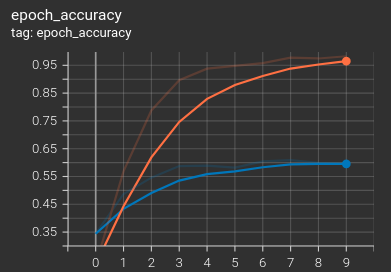 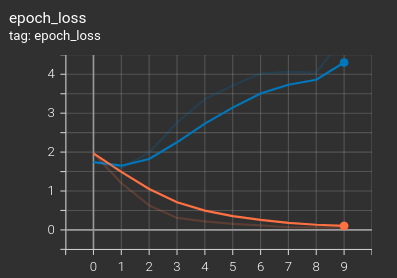

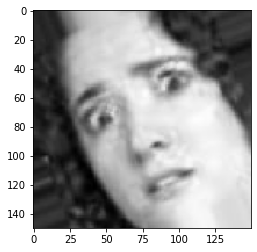

[[0. 0. 0. 0. 0. 0. 1. 0.]]
{'anger': 0, 'fear': 1, 'happy': 2, 'joy': 3, 'kiss': 4, 'neutral': 5, 'sadness': 6, 'surprise': 7}


In [71]:
#Tomo una imagen cualquiera y trato de identificar que tipo de clase es:
path = "./todaslascaras/test/fear_0_531.jpg"
img = image.load_img(path, target_size=(150,150))
plt.imshow(img)
plt.show()

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
imagenes = np.vstack([x])
val =  model.predict(imagenes)

print(val)
print(train_ds.class_indices)
